In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
from scipy import optimize
from scipy.optimize import curve_fit 
import scipy.special as sf

In [2]:
n, W, err = np.loadtxt('Wmass_data.txt', unpack=True)

In [3]:
def func_lin(W,a):
    return a 

n_fst, fst = curve_fit(func_lin, n, W, sigma=err, absolute_sigma=True)

print("initial fit")
print(n_fst)
print('\n')
print(fst)

initial fit
[80.37914613]


[[0.00010688]]


In [30]:
Fit1_err = fst[0]**0.5
Fit1_n = n_fst[0]

print('fit Wmass = ',Fit1_n,' +/-', Fit1_err,'')

fit Wmass =  80.37914612783638  +/- [0.01033819] 


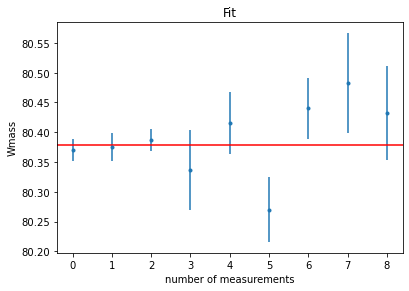

In [10]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_title('Fit')
axes.set_xlabel('number of measurements')
axes.set_ylabel('Wmass')

axes.errorbar(n, W, yerr = err, fmt='.', label = 'Error')
plt.axhline(y=func_lin(n, *n_fst), color='r', linestyle='-');

In [11]:
Fit1_chisq = np.sum( (W - func_lin(n,*n_fst))**2/err**2)
dof = len(W) - len(n_fst) - 1

p = sf.gammaincc(dof/2.0, Fit1_chisq/2.0)

In [12]:
print('Results\n')
print(' chi2 = ',Fit1_chisq,'\n dof = ', dof, '\n reduced chi2 = ', Fit1_chisq/dof, '\n p = ',p)

Results

 chi2 =  8.706836513332618 
 dof =  7 
 reduced chi2 =  1.2438337876189454 
 p =  0.27439480922611664


In [13]:
N, r, er = np.loadtxt('proton_radius_data.txt', unpack=True)

In [14]:
def func_line(N, c):
    return c

nrad, rad = curve_fit(func_line, N, r, sigma=er, absolute_sigma=True)

print("initial fit")
print(nrad)
print('\n')
print(rad)

initial fit
[0.84162252]


[[1.11377068e-07]]


In [60]:
Fit_er = rad[0]**0.5
Fit_m = nrad[0]

print('Fit Radius = ',Fit_m,' +/-', Fit_er,'')



Fit Radius =  0.8416225241593092  +/- [0.00033373] 


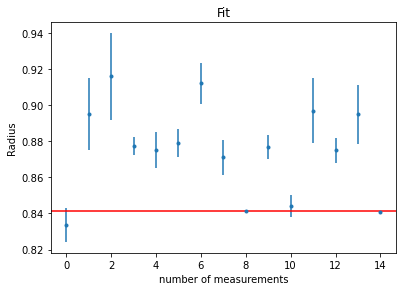

In [61]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_title('Fit')
axes.set_xlabel('number of measurements')
axes.set_ylabel('Radius')

axes.errorbar(N, r, yerr = er, fmt='.', label = 'Error')
plt.axhline(y=func_line(N, *nrad), color='r', linestyle='-');

In [62]:
Fit_chisq = np.sum( (r - func_line(N,*nrad))**2/er**2)
dof1 = len(r) - len(nrad) - 1

p1 = sf.gammaincc(dof/2.0, Fit1_chisq/2.0)

print('Results\n')
print(' chi2 = ',Fit_chisq,'\n dof = ', dof1, '\n reduced chi2 = ', Fit_chisq/dof1, '\n p = ', p1)

Results

 chi2 =  222.8986182713528 
 dof =  13 
 reduced chi2 =  17.146047559334832 
 p =  0.27439480922611664


In [63]:
ep, nn, ero = np.loadtxt('Ep_data.txt', unpack=True)

In [132]:
def gauss1(nn, p1, p2, p3):
    return p1*np.exp(-((nn-p2)**2)/(2*p3))


neep, eep = curve_fit(gauss1, nn, ep, sigma=ero, absolute_sigma=True)

print("Fit")
print(neep)
print('\n')
print(eep)

Fit
[  1.17039483  -6.42210147 532.33012087]


[[ 9.95841856e-02 -7.20099634e+00  2.47845648e+02]
 [-7.20099634e+00  5.54780587e+02 -1.98947848e+04]
 [ 2.47845648e+02 -1.98947848e+04  7.52276130e+05]]


In [122]:
Fit_ero = eep[1]**0.5
Fit_o = neep[1]

print('\n e/p = ',Fit_o,' +/-', Fit_ero,'')


 e/p =  -6.422101468549801  +/- [        nan 23.55378074         nan] 


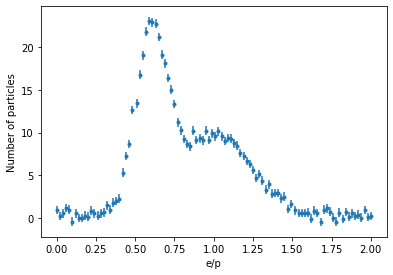

In [130]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlabel('e/p')
axes.set_ylabel('Number of particles')

axes.errorbar(ep, nn, yerr = ero, fmt='.', label = 'Error');

TypeError: gauss1() missing 1 required positional argument: 'p3'

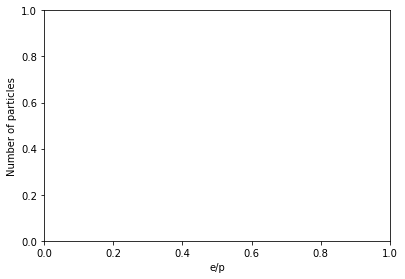

In [131]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlabel('e/p')
axes.set_ylabel('Number of particles')

axes.plot(nn, gauss1(nn, neep[0], neep[1]),'k--', label = 'Signal')


axes.errorbar(ep, nn, yerr = ero, fmt='.', label = 'Error');